# [CalTeach Fall 2022] Avocado Analysis

**Notebook Developed By:** Abigail Yu, Jonathan Ferrari

### Learning Outcomes

In this notebook, you will learn:
- how to understand, perform, and analyze results of a _t-test_ using data that you have collected.
- more?

### Table of Contents
1. [Introduction](#0) <br>
1. [What is a t-test?](#1) <br>
1. [Background on t-tests](#2) <br>
1. [The first step of a t-test](#3) <br>
1. [p-value](#4) <br>
1. [Performing a t-test without a calculator](#5) <br>
1. [Performing a t-test with a calculator](#6) <br>
1. [Finding $t$](#7) <br>
1. [Visualizing the results](#8) <br>
1. [Analyze the p-value](#9) <br>
1. [Conclusion](#10) <br>
1. [Feedback Form](#11)<br>

-------------------------------------------------------------------

In [21]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Introduction <a id='0'></a>

Avocados. From guacamole to morning toast, avocados have risen in popularity immensely. They are used in salads and salsas, spring rolls and sandwiches – they are even snuck into chocolatey brownies! But of course, if more and more people want a product, what do you think will happen to the price?

Let’s make a hypothesis of what you expect the price of avocados to look like overtime if more and more people continue to want them? In your hypothesis, include your:

**Claim:** “Avocado prices will rise/drop/stay the same/etc.”

**Explanation:** “because….”

Type below:

<code><b>Double-click to replace this and type your answer here!</b></code>

# 2. What is a t-test? <a id='1'></a>

How can we look at changes overtime? Well, luckily the Hass Avocado Board has an extensive national dataset of avocado prices (and more!) from 2015 and onwards.

Let’s take a look at a random sample of the avocado prices in 2019 and 2022 from California:
> [FOR JONATHAN: [here is a link for the dataset from 2019](https://hassavocadoboard.com/category-data/?region=California&y=2019) and [here is the link for the dataset from 2022](https://hassavocadoboard.com/category-data/?region=California&y=2022) you may need to scroll down until you find the “Totals by PLU” box and download the csv that says “Download 2019/22 Weekly Retail Volume and Price Report”; I had to make an account to access this, but it is free and takes a couple of seconds! I’m not sure how to access this data and get a random sample of about 50 prices from each data set, so let’s talk further about that!
Ideally, the random sample should be formatted in a graph that shows some sort of distribution (like scatter plot or bar graph! [edit: I recently learned that a KDE exists? these might work too!])
I’m not sure of the extent for Jupyter graphs/visuals, but if it could have the option to display the 2019 graph only, 2022 graph only, and both at the same time, that would be awesome here!]

In [22]:
haas_prices_2019 = pd.read_csv('2019-plu-total-hab.csv')
haas_prices_2019

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
0,Albany,Weekly,2019-01-07 00:00:00,Conventional,0.921802,111277.47,3541.90,95713.80,149.31,10904.73,0.0,0.0,0.0,967.73
1,Albany,Weekly,2019-01-13 00:00:00,Conventional,0.906561,115663.46,2920.69,101796.05,181.26,10072.66,0.0,0.0,0.0,692.81
2,Albany,Weekly,2019-01-20 00:00:00,Conventional,0.998831,146107.67,4322.20,123402.11,179.63,17223.11,0.0,0.0,0.0,980.61
3,Albany,Weekly,2019-01-27 00:00:00,Conventional,1.052065,80297.47,3380.41,64018.59,210.82,11065.69,0.0,0.0,0.0,1621.96
4,Albany,Weekly,2019-02-03 00:00:00,Conventional,0.798758,186952.91,4371.56,169578.61,357.67,11217.30,0.0,0.0,0.0,1427.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,Total U.S.,Weekly,2019-12-08 00:00:00,Organic,1.583437,1206173.19,81966.85,105558.48,2637.20,615775.90,0.0,0.0,0.0,400234.76
6133,Total U.S.,Weekly,2019-12-15 00:00:00,Organic,1.587130,1194675.71,75094.12,101804.89,1585.72,659339.34,0.0,0.0,0.0,356851.64
6134,Total U.S.,Weekly,2019-12-22 00:00:00,Organic,1.634366,1244018.95,124288.99,137682.25,2436.88,576748.74,0.0,0.0,0.0,402862.07
6135,Total U.S.,Weekly,2019-12-29 00:00:00,Organic,1.577548,1189311.69,91737.68,123829.81,1565.69,507016.04,0.0,0.0,0.0,465162.47


In [23]:
haas_prices_2022 = pd.read_csv('2019-plu-total-hab.csv')
haas_prices_2022

,Geography,Timeframe,Current Year Week Ending,Type,ASP Current Year,Total Bulk and Bags Units,4046 Units,4225 Units,4770 Units,TotalBagged Units,SmlBagged Units,LrgBagged Units,X-LrgBagged Units,Bulk GTIN
0,Albany,Weekly,2019-01-07 00:00:00,Conventional,0.921802,111277.47,3541.90,95713.80,149.31,10904.73,0.0,0.0,0.0,967.73
1,Albany,Weekly,2019-01-13 00:00:00,Conventional,0.906561,115663.46,2920.69,101796.05,181.26,10072.66,0.0,0.0,0.0,692.81
2,Albany,Weekly,2019-01-20 00:00:00,Conventional,0.998831,146107.67,4322.20,123402.11,179.63,17223.11,0.0,0.0,0.0,980.61
3,Albany,Weekly,2019-01-27 00:00:00,Conventional,1.052065,80297.47,3380.41,64018.59,210.82,11065.69,0.0,0.0,0.0,1621.96
4,Albany,Weekly,2019-02-03 00:00:00,Conventional,0.798758,186952.91,4371.56,169578.61,357.67,11217.30,0.0,0.0,0.0,1427.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,Total U.S.,Weekly,2019-12-08 00:00:00,Organic,1.583437,1206173.19,81966.85,105558.48,2637.20,615775.90,0.0,0.0,0.0,400234.76
6133,Total U.S.,Weekly,2019-12-15 00:00:00,Organic,1.587130,1194675.71,75094.12,101804.89,1585.72,659339.34,0.0,0.0,0.0,356851.64
6134,Total U.S.,Weekly,2019-12-22 00:00:00,Organic,1.634366,1244018.95,124288.99,137682.25,2436.88,576748.74,0.0,0.0,0.0,402862.07
6135,Total U.S.,Weekly,2019-12-29 00:00:00,Organic,1.577548,1189311.69,91737.68,123829.81,1565.69,507016.04,0.0,0.0,0.0,465162.47


What are some observations (trend, mean/median, variability/range, outliers, significant data points, etc.) you have about the data in **2019**?

<code><b>Double-click to replace this and type your answer here!</b></code>

What are some observations (trend, mean/median, variability/range, outliers, significant data points, etc.) you have about the data in **2022**?

<code><b>Double-click to replace this and type your answer here!</b></code>

What specific value(s) in each data set should we use to determine if there was a change overtime?

<code><b>Double-click to replace this and type your answer here!</b></code>

Looking at the dataset, what would you hypothesize? Do you think there is a change in price between the two years? In which direction? How confident are you and why?

<code><b>Double-click to replace this and type your answer here!</b></code>

# 3. Background on t-tests <a id='2'></a>
In most cases, when we look at two different data sets to compare, there may be some overlapping points. For example, even though the overall graph shows the price of avocados in 2022 being greater than the price of avocados in 2019, we still see some points in the 2022 graph that are less than points of the 2019 graph. If there is a lot of overlap, looking at a visual or single calculated value may not be enough!

In this case, it may be best to use a **two sample t-test**. A two sample t-test is a statistical test that can help us compare the means, or average, of the two dataset. T-tests have a specific criteria that the data must abide by to work:

The data has to be:
- independent – the data do not affect each other
- a randomly selected sample
- large... (sample size recommended to be over 30, otherwise, it MUST be normally distributed)
- ...but not too large (sample size is at MOST 10% of the total population)

Keep in note, we are using samples of the entire population. That is why we can use a t-test! Otherwise we would use a different test. In most cases, you will not be able to collect data about an entire population, so _t-tests are incredibly useful here!_

Remember, our question is: **Did the price of avocados increase from 2019 to 2022?**

# 4. The first step of a t-test <a id='3'></a>

The first t-test step is to create our null hypothesis ($H_0$) and alternative hypothesis ($H_a$).

- A **null hypothesis** is our assumption that says there is no difference between the two means. Typically, the format would follow $\mu_a = \mu_b$, where a and b are your identifying titles to separate the two samples and $\mu$ is the Greek letter Mu.
- The **alternative hypothesis** is what we want to test. Typically, the format would follow $\mu_a < \mu_b$, $\mu_a > \mu_b$, or $\mu_a \neq \mu_b$.

Write down what you think the null hypothesis and alternative hypothesis would be using the variables $\mu_{2019}$ and $\mu_{2022}$:

$H_0$: <code><b>Double-click to replace this and type your answer here!</b></code>

$H_a$: <code><b>Double-click to replace this and type your answer here!</b></code>

Let’s check if your hypotheses are correct! [@abby: try to incorporate hide code cell?]

$H_0$: $\mu_{2019} = \mu_{2022}$

$H_a$: $\mu_{2019} < \mu_{2022}$
- _Note that ($\mu_{2019} > \mu_{2022}$ would also be correct! The process to solve this is the same, but let’s follow using the first inequality._

# 5. p-value <a id='4'></a>

At the end, we will receive a **p-value**. That p-value is compared to the probability “limit,” helping us determine if we are able to reject our null hypothesis.

The “limit” is called the significance level, denoted as α. Typically, α is set to 0.05, but it can vary depending on the field of study. Essentially, α = 0.05 just means **there is a 5% risk that we reject the null hypothesis (or conclude that there is a significant change) even though there is actually no difference between the means (null hypothesis is actually true!)**.

So in the context of avocados, if we have a p-value that is lower than α = 0.05, we can assert with 95% confidence that _the prices of avocados from 2019 and 2022 are not the same_. That is, there is a 5% chance that the prices are the same, even though our calculations state otherwise.

For this problem, let’s set our α = 0.05.

There are two ways to perform a t-test with this data: with a calculator function and without a calculator function. Let’s look at without first:

# 6. Performing a t-test without a calculator <a id='5'></a>

We start by finding the means, standard deviations, and the count of each data sample. 

We can find the **mean** by adding up each of the values and dividing the sum by the count:

$$mean = \frac{\text{sum of the terms}}{\text{number of terms}}$$

**Standard deviation** for a sample is the square root of the sum of the square of each term subtracted by the mean divided by the number of terms minus one. That's a mouthful! Let’s look at the formula to understand this better:

$$s=\sqrt{\frac{\sigma(x-\bar{x})^2}{n-1}}$$

where $x$ is the value, $\bar{x}$ is the mean of the value, and $n$ is the count (the number of data points you have in the sample).

All of these values can be determined manually through a calculator, or you can use the _2-Var Stats_ function under `[STAT]` on a TI-84 as you'll see in the following section.

# 7. Performing a t-test with a calculator <a id='6'></a>

To use a TI-84:
1. Press `[STAT]`.
2. Press `[ENTER]` or `[1]` to get into EDIT
3. Input your data into the lists. Each list should correspond to a sample.
4. Press `[STAT]` again.
5. Use the arrows to scroll over to CALC and hit `[2]` or select "2-Var Stats".
6. Set "Xlist" as one of your filled lists. Set "Ylist" as your other filled list. You can change the list by hitting `[2ND][LIST]` and scrolling down on NAMES to select your desired list.
7. Leave FreqList empty. 
8. Scroll to the bottom and hit **Calculate**.

You specifically want to record $\bar{x}$, $S_x$, $\bar{y}$, $S_y$, and $n$. Note that if the two samples are different sizes, then you can do two 1-Var Stats tests for each sample. Make sure to note $n_x$ and $n_y$.

Let the x-variables represent the data sample from 2019. Let the y-variables represent the data sample from 2022.

What did you get for each of the values?

$\bar{x}_{2019}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$S_{2019}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$\bar{x}_{2022}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$S_{2022}$: <code><b>Double-click to replace this and type your answer here!</b></code>

$n$: <code><b>Double-click to replace this and type your answer here!</b></code>

Let’s check your work! [FOR JONATHAN: Because the random sample is going to be determined later, I can fill in these samples, or we can maybe develop a formula that automatically fills these in?]

$\bar{x}_{2019}$: [CALCULATED ANSWER]

$S_{2019}$: [CALCULATED ANSWER]

$\bar{x}_{2022}$: [CALCULATED ANSWER]

$S_{2022}$: [CALCULATED ANSWER]

$n$: [CALCULATED ANSWER]

# 8. Finding $t$ <a id='7'></a>

Great job finding the main data statistics! Let’s use this information to help us form a t-test now!
The general formula to find the t-statistic is:

$$t=\frac{\bar{x_a}-\bar{x_b}}{\sqrt{\frac{s_a^2}{n_a}-\frac{s_b^2}{n_b}}}$$

In this case, we can rewrite the formula in terms of our own variables:

$$t=\frac{\bar{x_{2019}}-\bar{x_{2022}}}{\sqrt{\frac{s_{2019}^2-s_{2022}^2}{n}}}$$

Go ahead and plug in the values to see what you get:

$t$ = <code><b>Double-click to replace this and type your answer here!</b></code>

Let’s check our work again:

$t$ = [CALCULATED ANSWER]

# 9. Visualizing the results <a id='8'></a>
We are almost there! Now we have to find the probability of the t-distribution of becoming more extreme than the t-statistic. Let’s visualize this!

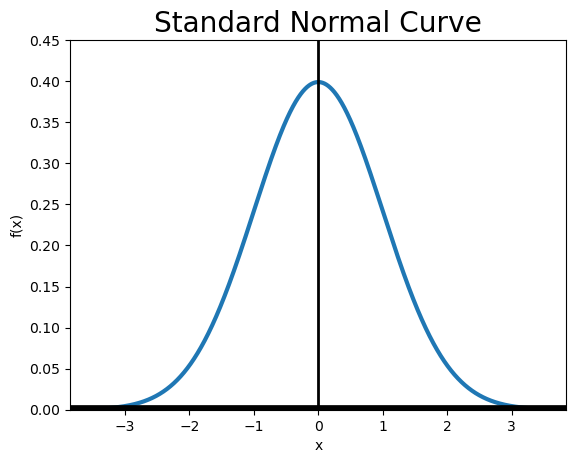

In [24]:
# Don't worry too much about this code, we're just trying to get a good visualization of a normal curve.
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
x = np.arange(-3.5, 3.5, 0.001)
ax.plot(x, norm.pdf(x), linewidth=3)
ax.set_ylim(0, 0.45)
plt.axvline(x=0, linewidth=2, color="black")
plt.axhline(y=0, linewidth=7, color="black")
ax.set_title('Standard Normal Curve')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

This is a standard normal curve. The mean is at the middle line where $x=0$.

Let’s now try to graph where a generic t-statistic would land from both ends of the mean – let’s say t-statistic = 1. 

NameError: name 'y' is not defined

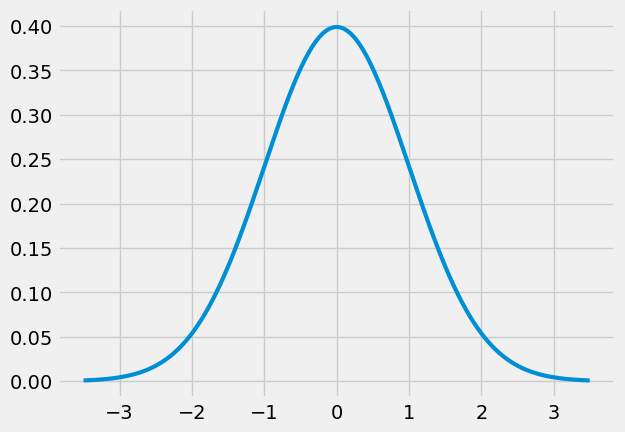

In [25]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
x = np.arange(-3.5, 3.5, 0.001)
ax.plot(x, norm.pdf(x), linewidth=3)
ax.fill_between(x, y, 0, where = (x >= -1) & (x <= 1), alpha=0.3, color='g')
ax.fill_between(x, y, 0, where = (x <= -1), alpha=0.1, color='r')
ax.fill_between(x, y, 0, where = (x >= 1), alpha=0.1, color='r')
ax.set_ylim(0, 0.45)
plt.axvline(x=0, linewidth=2, color="black")
plt.axhline(y=0, linewidth=7, color="black")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

When we deal with finding the probability, we actually want to look at the tail(s) of the graph, so focus on the red areas instead of the green!

If we want to find the probability that:
- $\mu_a < \mu_b$: Find the probability of the left tail end.
- $\mu_a > \mu_b$: Find the probability of the right tail end.
- $\mu_a \neq \mu_b$: Find the probability of the left tail end and the right tail end (double the value).

Describe what portion of the normal curve you are wanting to find the probability of for our avocado problem! Make sure to include the t-statistic by drawing a rough sketch.

<code><b>Double-click to replace this and type your answer here!</b></code>

The normal graph should look something like:

In [ ]:
fig, ax = plt.subplots()
plt.style.use('fivethirtyeight')
x = np.arange(-3.5, 3.5, 0.001)
ax.plot(x, norm.pdf(x), linewidth=3)
ax.fill_between(x, y, 0, where = (x <= 1.38), alpha=0.3, color='g')
ax.fill_between(x, y, 0, where = (x >= 1.38), alpha=0.1, color='r')
ax.set_ylim(0, 0.45)
plt.axvline(x=0, linewidth=2, color="black")
plt.axhline(y=0, linewidth=7, color="black")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

And you want to find the probability of the white portion! [NEED TO ADJUST TO MATCH THE CALCULATED T-STATISTIC]

So how do we find the probability? We can use a test in our calculators called tcdf!

To find the probability:
1. Press `[2ND][DISTR]`
2. Press `[6]` or scroll to "tdcf("
3. Enter your lower bound. If your lower bound is the end of the curve, put -1E99; to enter E, press `[2ND][EE]`).
4. Enter your upper bound. If your upper bound is the end of the curve, put 1E99; to enter E, press `[2ND][EE]`).
5. Enter the smallest sample size minus 1 as the df.
6. Hit `Paste`.

Determine the probability for our avocado data:

tcdf(`____`, `_____`, `_____`) = `______`

Check your work!

tcdf(-1E99, `[T-STAT]`, 49) = [ANS]

# 10. Analyze the p-value <a id='9'></a>
Great! We got our numbers and now it is time to interpret the data! Remember that significance level we talked about before? We are going to compare our probability, commonly known as **p-value**, to $\alpha$. There are two outcomes:

- p-value < $\alpha$
    - This is great! We can reject the null hypothesis and suggest the alternative hypothesis. 
    - "Since the p-value of [p-value] is less than 0.05, we can reject the null hypothesis of no difference in favor of the alternative and conclude that, on average, [describe Ha in words].”
- p-value > $\alpha$
    - Here, we cannot reject the null hypothesis! Note that we DO NOT accept the null hypothesis, it just means we cannot make a firm conclusion.
    - “Because the p-value of [p-value] is larger than 0.05, we fail to reject the null hypothesis. There is not convincing evidence that [describe Ha in words].”

With our p-value, analyze your results by comparing it to $\alpha$ = 0.05.

<code><b>Double-click to replace this and type your answer here!</b></code>

Check your work!

- p-value < $\alpha$
    - “Since the p-value of [p-value] is less than 0.05, we can reject the null hypothesis of no difference in favor of the alternative and conclude that, on average, the price of avocados in 2019 is less than the price of avocados in 2022. ”
- p-value > $\alpha$
    - Here, we cannot reject the null hypothesis! Note that we DO NOT accept the null hypothesis, it just means we cannot make a firm conclusion.
    - “Because the p-value of [p-value] is larger than 0.05, we fail to reject the null hypothesis. There is not convincing evidence that the price of avocados in 2019 is less than the price of avocados in 2022.”


And that's how you perform a t-test!

# Conclusion <a id='10'></a>

**Congratulations on finishing the notebook!** There was a lot of content but here's what you learned throughout this notebook:
- [ADD LEARNING GOALS HERE]

# Survey <a id='11'></a>

This survey is all anonymous. You are not required to answer any questions, but responses are highly encouraged! These answers will be used to study curriculum and how to improve (online) lessons.

- Grade:
- Have you taken or are you currently taking a statistics course: <code><b>YES or NO</b></code>
- What did you like about this lesson:
- What did you not like about this lesson (What would you like changed?):
- On a scale of 1-10, how effective was the lesson (How much information did you retain):
- On a scale of 1-10, how likely are you to recommend this lesson to others:

# Feedback Form <a id='13'></a>

<div class="alert alert-info">
<b> We encourage student to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://forms.gle/hipxf2uFw5Ud4Hyn8)